# Oil well location selection.

You work for a mining company. Your task is to find the best place for a new well (find the region with the highest profit margin).

Steps to choose the location: 
1. Collect the oil well parameters in the selected region: oil quality and volume of reserves;
2. Build a model for predicting the volume of reserves in the new wells; 
3. Pick the oil wells with the highest estimated values; 
4. Pick the region with the highest total profit for the selected oil wells. You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the bootstrapping technique.

Description of the data:
- geo_data_0.csv - download dataset data_0
- geo_data_1.csv - download dataset data_1
- geo_data_2.csv - download dataset data_2
- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- product — volume of reserves in the oil well (thousand barrels).

## Import of the data

In [1]:
#Import main libraries

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from numpy.random import RandomState

Import data for 3 regions.

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Check the first 5 rows of data from 3 regions.

In [3]:
print(geo_data_0.head())
print('-'*53)
print(geo_data_1.head())
print('-'*53)
print(geo_data_2.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
-----------------------------------------------------
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
-----------------------------------------------------
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.5

Check the general information about the data of 3 regions.

In [4]:
print("Регион 1:")
print('-'*37)
print(geo_data_0.info())
print()
print("Регион 2:")
print('-'*37)
print(geo_data_1.info())
print()
print("Регион 3:")
print('-'*37)
print(geo_data_2.info())

Регион 1:
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Регион 2:
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Регион 3:
--------------

Check the duplicates.

In [5]:
print("Дубликатов в наборе данных для региона 1:", geo_data_0.duplicated().sum())
print("Дубликатов в наборе данных для региона 2:", geo_data_1.duplicated().sum())
print("Дубликатов в наборе данных для региона 3:", geo_data_2.duplicated().sum())

Дубликатов в наборе данных для региона 1: 0
Дубликатов в наборе данных для региона 2: 0
Дубликатов в наборе данных для региона 3: 0


Check descriptive statistics for 3 regions.

In [6]:
print("Регион 1:")
print('-'*65)
print(geo_data_0.describe())
print()
print("Регион 2:")
print('-'*65)
print(geo_data_1.describe())
print()
print("Регион 3:")
print('-'*65)
print(geo_data_2.describe())

Регион 1:
-----------------------------------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

Регион 2:
-----------------------------------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572     

Check correlation in 3 datasets.

In [7]:
print(geo_data_0.corr())
print(geo_data_1.corr())
print(geo_data_2.corr())

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


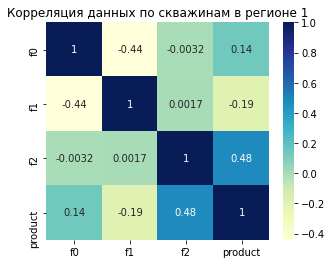

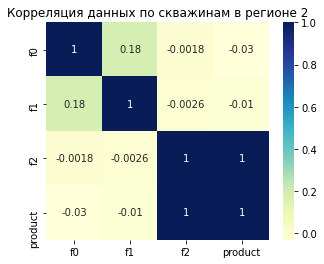

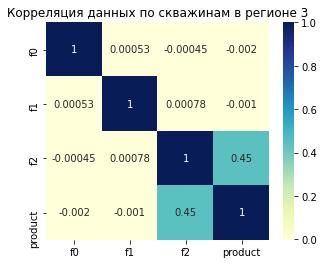

In [15]:
#Create a graph to visualize correlation

geo_list = [geo_data_0, geo_data_1, geo_data_2]

count = 0
for i in geo_list:
    count +=1
    plt.figure(figsize=(5,4))
    sns.heatmap(i.corr(), xticklabels=i.corr().columns, yticklabels=i.corr().columns, annot=True, cmap='YlGnBu')
    plt.title('Корреляция данных по скважинам в регионе '+str(count))
    plt.show()

Check distribution of values of product column in 3 regions.

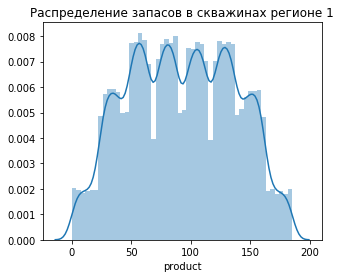

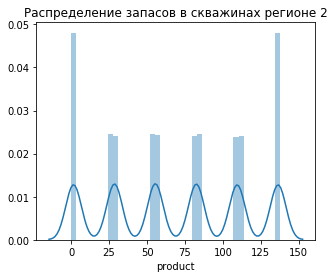

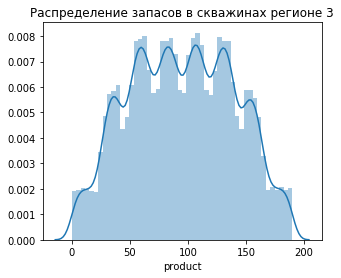

In [9]:
plt.figure(figsize=(5,4))
sns.distplot(geo_data_0['product'])
plt.title('Распределение запасов в скважинах регионе 1')
plt.show()

plt.figure(figsize=(5,4))
sns.distplot(geo_data_1['product'])
plt.title('Распределение запасов в скважинах регионе 2')
plt.show()

plt.figure(figsize=(5,4))
sns.distplot(geo_data_2['product'])
plt.title('Распределение запасов в скважинах регионе 3')
plt.show()

### Conclusion.

Data for three regions was uploaded and verified.

No missing values or duplicates were found in the data.

Based on descriptive statistics, the largest average and median value of oil reserves in the data set is in the region 3.

In general, the correlation among parameters is week except for the region 2, where a strong correlation is observed for the attribute f2 and the value of product.



## Model training and validation

2.1. Split the data into training and validation samples in a ratio of 75:25.

2.2. Train the model and make predictions on the validation sample.

2.3. Save the predictions and correct answers on the validation sample.

2.4. Print the average stock of the predicted raw materials and the RMSE of the model.

In [10]:
def data_model(df):
    features = df.drop(['id','product'], axis=1)
    train = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features , train, test_size=0.25, random_state=12345)
    
    model=LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid=model.predict(features_valid)
    rmse = (mean_squared_error(target_valid, predictions_valid))**0.5
    average_predicted_reserve = pd.Series(predictions_valid).mean()
    target_valid = target_valid.reset_index(drop=True)
    predictions_valid = pd.Series(predictions_valid)
    return rmse, average_predicted_reserve, predictions_valid, target_valid


#Apply the formula
rmse1, Average_predicted_reserve1, reg1_prediction, target1_valid  = data_model(geo_data_0)
rmse2, Average_predicted_reserve2, reg2_prediction, target2_valid = data_model(geo_data_1)
rmse3, Average_predicted_reserve3, reg3_prediction, target3_valid  = data_model(geo_data_2)


reg1= [rmse1, Average_predicted_reserve1]
reg2= [rmse2, Average_predicted_reserve2]
reg3= [rmse3, Average_predicted_reserve3]

result = pd.DataFrame(data = [reg1, reg2, reg3],
                     columns =['RMSE','Average_predicted_reserve'],
                    index=['Region_1','Region_2','Region_3'])

print(result)

               RMSE  Average_predicted_reserve
Region_1  37.579422                  92.592568
Region_2   0.893099                  68.728547
Region_3  40.029709                  94.965046


### Conclusion.

The smallest RMSE error is for the model for region 2, the model predicts almost perfectly, while the average predicted volume of reserves in this region is the smallest.

According to the prediction of the model, region 3 has the largest margin, but this region also has the largest error.

For region 1, the model predicts the second largest oil reserves among 3 regions with an error less than the error for region 3.


## Preparation for profit calculation

3.1. Save all key values for calculations in separate variables.

In [11]:
BUDGET = 10000000000
SAMPLE = 500
SUBSAMPLE = 200
INCOME = 450000
RISK = 0.0025

3.2. Calculate a break-even point of a new well. Compare this breakeven point with the average stock in each region.

In [12]:
breakeven_point = (budget/subsample)/income
print('Точка безубыточности: {:.2f}'.format(breakeven_point))

Точка безубыточности: 111.11


In [13]:
print('Средний запас сырья в регионе 1: {:.2f}'.format(geo_data_0['product'].mean()))
print('Средний запас сырья в регионе 2: {:.2f}'.format(geo_data_1['product'].mean()))
print('Средний запас сырья в регионе 3: {:.2f}'.format(geo_data_2['product'].mean()))

Средний запас сырья в регионе 1: 92.50
Средний запас сырья в регионе 2: 68.83
Средний запас сырья в регионе 3: 95.00


### Conclusion.

In order for the development of a new well to break even, it is necessary that the stock of raw materials is at least 111.11 thousand barrels.

The average stock of raw materials in all three regions is less than this value, so an arbitrary choice of wells can lead to a loss. However, taking into account the total number of wells and the values of 75% of the quantiles for the three regions, there are wells in these regions that meet the break-even conditions.

## Calculation of profit and risks 

4.1. Select wells with maximum prediction values.

4.2. Sum up the target value of the volume of raw materials corresponding to these predictions.

4.3. Calculate the profit for the received volume of raw materials.

Create a function for calculating profit taking into account the predictions of the model

In [14]:
def profit(target, probabilities, count):
    probabilities_sorted = pd.Series(probabilities).sort_values(ascending=False)
    best_oilwells = target[probabilities_sorted.index][:count]
    return (income * best_oilwells.sum() - (budget))

Calculate the profit based on the results of predictions for three regions.

In [15]:
income_1 = profit(target1_valid, reg1_prediction, 200)
income_2 = profit(target2_valid, reg2_prediction, 200)
income_3 = profit(target3_valid, reg3_prediction, 200)

print('Прибыль региона 1: {:.2f} млрд'.format(income_1/10**9))
print('Прибыль региона 2: {:.2f} млрд'.format(income_2/10**9))
print('Прибыль региона 3: {:.2f} млрд'.format(income_3/10**9))

Прибыль региона 1: 3.32 млрд
Прибыль региона 2: 2.42 млрд
Прибыль региона 3: 2.71 млрд


Calculate the risks and profits for each region:

5.1. Apply the Bootstrap technique with 1000 samples to find the profit distribution.

5.2. Find the average profit, the 95% confidence interval and the risk of losses. A loss is a negative profit.

5.3. Write conclusion: suggest a region for the development of wells and justify the choice.


In [16]:
def bootstrep (target,prediction):
    state=np.random.RandomState(12345)
    values=[]
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        prediction_subsample = prediction[target_subsample.index]
        values.append(profit(target_subsample, prediction_subsample, 200))
        
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = (values < 0).mean()*100
    
    return mean, lower, upper, risk

mean1, lower1, upper1, risk1 = bootstrep(target1_valid, reg1_prediction)
mean2, lower2, upper2, risk2 = bootstrep(target2_valid, reg2_prediction)
mean3, lower3, upper3, risk3 = bootstrep(target3_valid, reg3_prediction)



In [17]:
result1 = [mean1/10**9, lower1/10**9, upper1/10**9, risk1]
result2 = [mean2/10**9, lower2/10**9, upper2/10**9, risk2]
result3 = [mean3/10**9, lower3/10**9, upper3/10**9, risk3]

result = pd.DataFrame(data = [result1 , result2 , result3],
                     columns =['Mean','Lower','Upper','Risks level, %'],
                    index=['Region_1','Region_2','Region_3'])

print(result)

              Mean     Lower     Upper  Risks level, %
Region_1  0.425939 -0.102090  0.947976             6.0
Region_2  0.515223  0.068873  0.931548             1.0
Region_3  0.435008 -0.128881  0.969707             6.4


## Conclusion.

Based on the predictions of the model, it can be concluded that the least risky region for development is region 2, which also has the highest average predicted profit.